In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os,PIL,pathlib
import numpy as np
import pandas as pd
import warnings
from tensorflow import keras

warnings.filterwarnings("ignore")
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

## 超参数设置

In [35]:
height = 64
width = 64
batch_size = 128
epochs = 60

## 数据处理

In [3]:
import os
print(os.getcwd()) # 获取当前工作目录路径

C:\Users\f\Desktop\nlp


In [4]:
#映射
digit_map = {
    '零': 0,
    '一': 1,
    '二': 2,
    '三': 3,
    '四': 4,
    '五': 5,
    '六': 6,
    '七': 7,
    '八': 8,
    '九': 9,
    '十': 10,
    '百': 11,
    '千': 12,
    '万': 13,
    '亿': 14
}


### 标签获取

In [5]:
train = pd.read_csv(os.path.join(os.getcwd(), "./data/train_dict.csv"))
test = pd.read_csv(os.path.join(os.getcwd(), "./data/dev_dict.csv"))
#训练数据的标签
train_image_label = [i for i in train["character"]]
test_image_label = [i for i in test["character"]]

#映射标签
train_label_ds = [digit_map[char] for char in train_image_label]
test_label_ds = [digit_map[char] for char in test_image_label]
# print(train_label_ds)

#将标签切片
train_label_ds = tf.data.Dataset.from_tensor_slices(train_label_ds)
test_label_ds = tf.data.Dataset.from_tensor_slices(test_label_ds)
train_label_ds

<_TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.int32, name=None)>

### 数据获取

In [6]:
#训练数据的具体路径
img_dir = os.path.join("./data/train/")
test_dir = os.path.join("./data/dev/")
train_image_paths = []
test_image_paths = []

for row in train.itertuples():
    suite_id = row[1]
    sample_id = row[2]
    code = row[3]
    train_image_paths.append(img_dir+"input"+"_"+str(suite_id)+"_"+str(sample_id)+"_"+str(code)+".jpg")
for row in test.itertuples():
    suite_id = row[1]
    sample_id = row[2]
    code = row[3]
    test_image_paths.append(test_dir+"input"+"_"+str(suite_id)+"_"+str(sample_id)+"_"+str(code)+".jpg")   
#对图片路径进行切片
train_path_ds = tf.data.Dataset.from_tensor_slices(train_image_paths)
test_path_ds = tf.data.Dataset.from_tensor_slices(test_image_paths)
print(test_image_paths)

['./data/dev/input_60_9_8.jpg', './data/dev/input_9_7_9.jpg', './data/dev/input_8_4_2.jpg', './data/dev/input_47_9_14.jpg', './data/dev/input_21_9_2.jpg', './data/dev/input_24_4_1.jpg', './data/dev/input_10_2_8.jpg', './data/dev/input_84_9_4.jpg', './data/dev/input_36_4_4.jpg', './data/dev/input_22_3_3.jpg', './data/dev/input_56_5_4.jpg', './data/dev/input_76_7_11.jpg', './data/dev/input_60_2_6.jpg', './data/dev/input_27_8_9.jpg', './data/dev/input_94_5_1.jpg', './data/dev/input_77_4_4.jpg', './data/dev/input_84_3_8.jpg', './data/dev/input_44_8_9.jpg', './data/dev/input_49_1_10.jpg', './data/dev/input_81_6_9.jpg', './data/dev/input_94_5_8.jpg', './data/dev/input_40_2_13.jpg', './data/dev/input_87_9_11.jpg', './data/dev/input_24_8_4.jpg', './data/dev/input_45_1_12.jpg', './data/dev/input_92_7_7.jpg', './data/dev/input_50_2_10.jpg', './data/dev/input_15_7_13.jpg', './data/dev/input_59_7_9.jpg', './data/dev/input_52_5_1.jpg', './data/dev/input_91_6_12.jpg', './data/dev/input_19_1_11.jpg',

### 图片预处理

In [7]:
#图片预处理
def preprocess_image(image):
#     height = 256
#     width = 256
    image = tf.image.decode_jpeg(image,channels = 3)
    image = tf.image.resize(image,[height,width])
    return image / 255.0

def load_and_preprocess_image(path):
    image = tf.io.read_file(path)
    return preprocess_image(image)

#根据路径读取图片并进行预处理
train_image_ds = train_path_ds.map(load_and_preprocess_image,num_parallel_calls=tf.data.experimental.AUTOTUNE)
test_image_ds = test_path_ds.map(load_and_preprocess_image,num_parallel_calls=tf.data.experimental.AUTOTUNE)

In [8]:
print(test_label_ds)

<_TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.int32, name=None)>


In [9]:
train_ds = tf.data.Dataset.zip((train_image_ds,train_label_ds))
test_ds = tf.data.Dataset.zip((test_image_ds,test_label_ds))

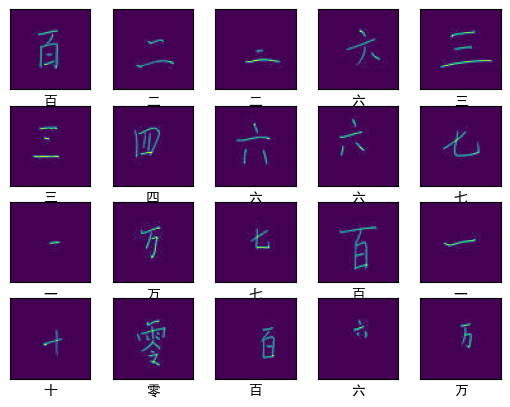

In [10]:
for i in range(20):
    plt.subplot(4, 5, i + 1)
#     num +=1
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    # 显示图片
    images = plt.imread(train_image_paths[i])
    plt.imshow(images)
    # 显示标签
    plt.xlabel(train_image_label[i])

plt.show()


In [12]:
# 设置batch
train_ds = train_ds.batch(batch_size)
train_ds = train_ds.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
test_ds = test_ds.batch(batch_size)
test_ds = test_ds.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)


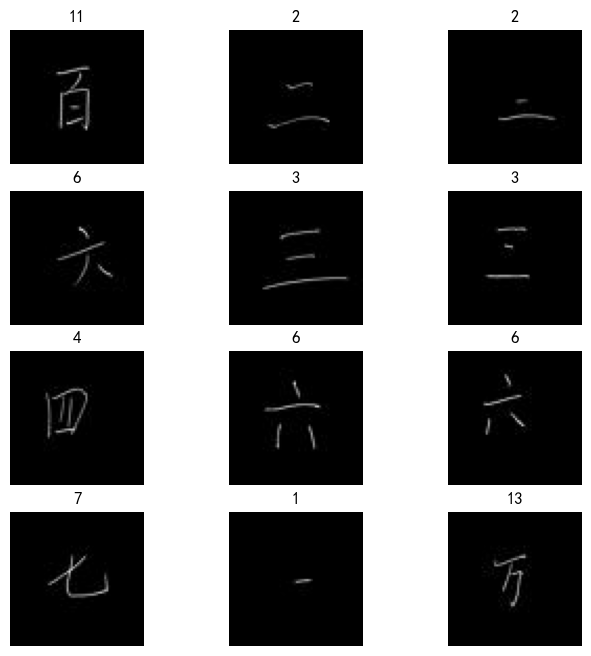

In [13]:
plt.figure(figsize=(8, 8))

for images, labels in train_ds.take(1):
    # print(images.shape)
    for i in range(12):
        ax = plt.subplot(4, 3, i + 1)
        plt.imshow(images[i])
        plt.title(labels[i].numpy())

        plt.axis("off")
    break
plt.show()


In [14]:
train_ds

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 64, 64, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

## 模型训练：ResNet18

In [46]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, Add, GlobalAveragePooling2D, Dense, Input
from tensorflow.keras.models import Model

def resnet_block(inputs, filters, kernel_size, strides, use_shortcut=False):
    x = Conv2D(filters, kernel_size=kernel_size, strides=strides, padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(filters, kernel_size=kernel_size, strides=1, padding='same')(x)
    x = BatchNormalization()(x)

    if use_shortcut:
        shortcut = Conv2D(filters, kernel_size=(1, 1), strides=strides, padding='same')(inputs)
        shortcut = BatchNormalization()(shortcut)
    else:
        shortcut = inputs

    x = Add()([x, shortcut])
    x = Activation('relu')(x)

    return x

def resnet18(input_shape, num_classes):
    inputs = Input(shape=input_shape)

    x = Conv2D(64, (7, 7), strides=(2, 2), padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same')(x)

    x = resnet_block(x, 64, (3, 3), strides=1)
    x = resnet_block(x, 64, (3, 3), strides=1)

    x = resnet_block(x, 128, (3, 3), strides=2, use_shortcut=True)
    x = resnet_block(x, 128, (3, 3), strides=1)

    x = resnet_block(x, 256, (3, 3), strides=2, use_shortcut=True)
    x = resnet_block(x, 256, (3, 3), strides=1)

    x = resnet_block(x, 512, (3, 3), strides=2, use_shortcut=True)
    x = resnet_block(x, 512, (3, 3), strides=1)

    x = GlobalAveragePooling2D()(x)
    outputs = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs, outputs)

    return model

# 创建 ResNet-18 模型
model = resnet18(input_shape=(64, 64, 3), num_classes=15)

# 编译模型
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 打印模型摘要
model.summary()

# 训练模型
history = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=epochs
)


Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)    │ (None, 64, 64, 3)         │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_20 (Conv2D)            │ (None, 32, 32, 64)        │           9,472 │ input_layer_8[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_17        │ (None, 32, 32, 64)        │             256 │ conv2d_20[0][0]            │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_16 (Activation)    │ (None, 32, 32, 64)        │               0 │ batch_normalization_17[0]… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_3               │ (None, 16, 16, 64)        │               0 │ activation_16[0][0]        │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_21 (Conv2D)            │ (None, 16, 16, 64)        │          36,928 │ max_pooling2d_3[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_18        │ (None, 16, 16, 64)        │             256 │ conv2d_21[0][0]            │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_17 (Activation)    │ (None, 16, 16, 64)        │               0 │ batch_normalization_18[0]… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_22 (Conv2D)            │ (None, 16, 16, 64)        │          36,928 │ activation_17[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_19        │ (None, 16, 16, 64)        │             256 │ conv2d_22[0][0]            │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ add_7 (Add)                   │ (None, 16, 16, 64)        │               0 │ batch_normalization_19[0]… │
│                               │                           │                 │ max_pooling2d_3[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_18 (Activation)    │ (None, 16, 16, 64)        │               0 │ add_7[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_23 (Conv2D)            │ (None, 16, 16, 64)        │          36,928 │ activation_18[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_20        │ (None, 16, 16, 64)        │             256 │ conv2d_23[0][0]            │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 11,198,607 (42.72 MB)

 Trainable params: 11,189,007 (42.68 MB)

 Non-trainable params: 9,600 (37.50 KB)

Epoch 1/60
71/71 ━━━━━━━━━━━━━━━━━━━━ 36s 401ms/step - accuracy: 0.5694 - loss: 1.4614 - val_accuracy: 0.0650 - val_loss: 15.3310
Epoch 2/60
71/71 ━━━━━━━━━━━━━━━━━━━━ 27s 383ms/step - accuracy: 0.9333 - loss: 0.1994 - val_accuracy: 0.1217 - val_loss: 10.8822
Epoch 3/60
71/71 ━━━━━━━━━━━━━━━━━━━━ 28s 394ms/step - accuracy: 0.9635 - loss: 0.1117 - val_accuracy: 0.2360 - val_loss: 7.9434
Epoch 4/60
71/71 ━━━━━━━━━━━━━━━━━━━━ 28s 400ms/step - accuracy: 0.9853 - loss: 0.0518 - val_accuracy: 0.4467 - val_loss: 3.6140
Epoch 5/60
71/71 ━━━━━━━━━━━━━━━━━━━━ 29s 411ms/step - accuracy: 0.9865 - loss: 0.0400 - val_accuracy: 0.6530 - val_loss: 2.3070
Epoch 6/60
71/71 ━━━━━━━━━━━━━━━━━━━━ 29s 403ms/step - accuracy: 0.9828 - loss: 0.0580 - val_accuracy: 0.7057 - val_loss: 1.5889
Epoch 7/60
71/71 ━━━━━━━━━━━━━━━━━━━━ 28s 393ms/step - accuracy: 0.9869 - loss: 0.0392 - val_accuracy: 0.8847 - val_loss: 0.4545
Epoch 8/60
71/71 ━━━━━━━━━━━━━━━━━━━━ 28s 396ms/step - accuracy: 0.9935 - loss: 0.0252 - val_ac

In [47]:
model.save('./model/model_ResNet18.keras')

In [51]:
predictions = model.predict(test_ds)
predicted_labels = tf.argmax(predictions, axis=1)
print(predicted_labels)

total_samples = 0
correct_predictions = 0
#转化为一致的类型
test_label_ds = test_label_ds.map(lambda x: tf.cast(x, tf.int64))
predicted_labels = tf.cast(predicted_labels, tf.int64)

for predicted_label, true_label in zip(predicted_labels, test_label_ds):
    total_samples += 1
    if predicted_label == true_label:
        correct_predictions += 1

accuracy = correct_predictions / total_samples
print(accuracy*100,'%')

24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step
tf.Tensor([7 8 1 ... 9 0 7], shape=(3000,), dtype=int64)
99.46666666666667 %


## 模型训练：CNN

In [36]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),padding="same",activation="relu",input_shape=[64, 64, 3]),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding="same",activation="relu"),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding="same",activation="relu"),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(15, activation="softmax")
])

model.compile(optimizer="adam",
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
model.summary()
history = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs = epochs
)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 64, 64, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │         262,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 15)                  │             975 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 319,503 (1.22 MB)

 Trainable params: 319,503 (1.22 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/60
71/71 ━━━━━━━━━━━━━━━━━━━━ 8s 100ms/step - accuracy: 0.3476 - loss: 2.1132 - val_accuracy: 0.7677 - val_loss: 0.7358
Epoch 2/60
71/71 ━━━━━━━━━━━━━━━━━━━━ 7s 98ms/step - accuracy: 0.8028 - loss: 0.5896 - val_accuracy: 0.8823 - val_loss: 0.3698
Epoch 3/60
71/71 ━━━━━━━━━━━━━━━━━━━━ 7s 99ms/step - accuracy: 0.9032 - loss: 0.3078 - val_accuracy: 0.9040 - val_loss: 0.2921
Epoch 4/60
71/71 ━━━━━━━━━━━━━━━━━━━━ 7s 100ms/step - accuracy: 0.9359 - loss: 0.2025 - val_accuracy: 0.9333 - val_loss: 0.2073
Epoch 5/60
71/71 ━━━━━━━━━━━━━━━━━━━━ 7s 102ms/step - accuracy: 0.9588 - loss: 0.1328 - val_accuracy: 0.9417 - val_loss: 0.1846
Epoch 6/60
71/71 ━━━━━━━━━━━━━━━━━━━━ 7s 99ms/step - accuracy: 0.9684 - loss: 0.0962 - val_accuracy: 0.9430 - val_loss: 0.1786
Epoch 7/60
71/71 ━━━━━━━━━━━━━━━━━━━━ 7s 98ms/step - accuracy: 0.9792 - loss: 0.0738 - val_accuracy: 0.9487 - val_loss: 0.1811
Epoch 8/60
71/71 ━━━━━━━━━━━━━━━━━━━━ 7s 98ms/step - accuracy: 0.9796 - loss: 0.0706 - val_accuracy: 0.9553 

Epoch 51/60
71/71 ━━━━━━━━━━━━━━━━━━━━ 7s 97ms/step - accuracy: 1.0000 - loss: 7.3868e-05 - val_accuracy: 0.9807 - val_loss: 0.1182
Epoch 52/60
71/71 ━━━━━━━━━━━━━━━━━━━━ 7s 98ms/step - accuracy: 1.0000 - loss: 6.9617e-05 - val_accuracy: 0.9807 - val_loss: 0.1190
Epoch 53/60
71/71 ━━━━━━━━━━━━━━━━━━━━ 7s 99ms/step - accuracy: 1.0000 - loss: 6.5516e-05 - val_accuracy: 0.9810 - val_loss: 0.1199
Epoch 54/60
71/71 ━━━━━━━━━━━━━━━━━━━━ 7s 98ms/step - accuracy: 1.0000 - loss: 6.1779e-05 - val_accuracy: 0.9807 - val_loss: 0.1207
Epoch 55/60
71/71 ━━━━━━━━━━━━━━━━━━━━ 7s 99ms/step - accuracy: 1.0000 - loss: 5.8167e-05 - val_accuracy: 0.9810 - val_loss: 0.1216
Epoch 56/60
71/71 ━━━━━━━━━━━━━━━━━━━━ 7s 104ms/step - accuracy: 1.0000 - loss: 5.4960e-05 - val_accuracy: 0.9807 - val_loss: 0.1224
Epoch 57/60
71/71 ━━━━━━━━━━━━━━━━━━━━ 7s 99ms/step - accuracy: 1.0000 - loss: 5.1895e-05 - val_accuracy: 0.9807 - val_loss: 0.1233
Epoch 58/60
71/71 ━━━━━━━━━━━━━━━━━━━━ 7s 101ms/step - accuracy: 1.0000 - l

In [102]:
model.save('./model/model_CNN.keras')

In [54]:
predictions = model.predict(test_ds)
predicted_labels = tf.argmax(predictions, axis=1)
print(predicted_labels)

total_samples = 0
correct_predictions = 0
test_label_ds = test_label_ds.map(lambda x: tf.cast(x, tf.int64))
predicted_labels = tf.cast(predicted_labels, tf.int64)

for predicted_label, true_label in zip(predicted_labels, test_label_ds):
    total_samples += 1
    if predicted_label == true_label:
        correct_predictions += 1

accuracy = correct_predictions / total_samples
print(accuracy*100,'%')

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step
tf.Tensor([7 8 1 ... 9 0 7], shape=(3000,), dtype=int64)
98.06666666666666 %
